# Import the necessary libraries

In [2]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import pandas as pd
import yfinance as yf

# sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))
# from load_csv_data import Load_CSV_Data


# Fetch Historical Data

In [6]:
# Define the stock symbols and the date range
symbols = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'

# Fetch data for each symbol
data = {}
for symbol in symbols:
    data[symbol] = yf.download(symbol, start=start_date, end=end_date)
    data[symbol]['Symbol'] = symbol

# Concatenate data into a single DataFrame
df = pd.concat(data.values())
df.to_csv('../data/historical_data.csv', index=False)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Basic Data Cleaning and Exploration

In [7]:
# Reset index to access Date column
df.reset_index(inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values (you can choose to fill or interpolate if desired)
df.dropna(inplace=True)

# Convert Date column to datetime format if not already
df['Date'] = pd.to_datetime(df['Date'])



Missing values in each column:
 Price      Ticker
Date                    0
Adj Close  TSLA      4948
Close      TSLA      4948
High       TSLA      4948
Low        TSLA      4948
Open       TSLA      4948
Volume     TSLA      4948
Symbol                  0
Adj Close  BND       4948
Close      BND       4948
High       BND       4948
Low        BND       4948
Open       BND       4948
Volume     BND       4948
Adj Close  SPY       4948
Close      SPY       4948
High       SPY       4948
Low        SPY       4948
Open       SPY       4948
Volume     SPY       4948
dtype: int64


# Visualize Closing Prices Over Time

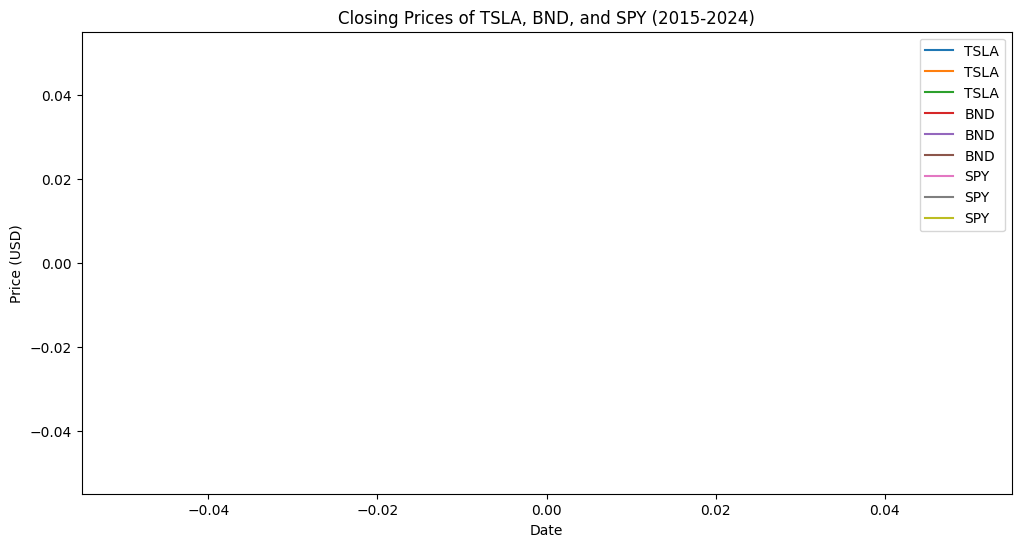

In [8]:
# Plot the closing prices for each asset
plt.figure(figsize=(12, 6))
for symbol in symbols:
    asset_data = df[df['Symbol'] == symbol]
    plt.plot(asset_data['Date'], asset_data['Close'], label=symbol)

plt.title("Closing Prices of TSLA, BND, and SPY (2015-2024)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

